<a href="https://colab.research.google.com/github/dhamvi01/Image-Classification-Dog-Cat/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Data Loading

The first step is to load the dataset. Before that, let’s read some import and useful modules from the fast.ai framework

Firstly, it will do data augmentation by flipping the pictures horizontally, making some rotations and zoomings. By doing so, it can supply the model with more training data, and prevent the model from overfitting.

Secondly, it will set the default size of each image to 224 x 224, so that we can apply some certain pre-trained models which admit this size as their inputs



In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


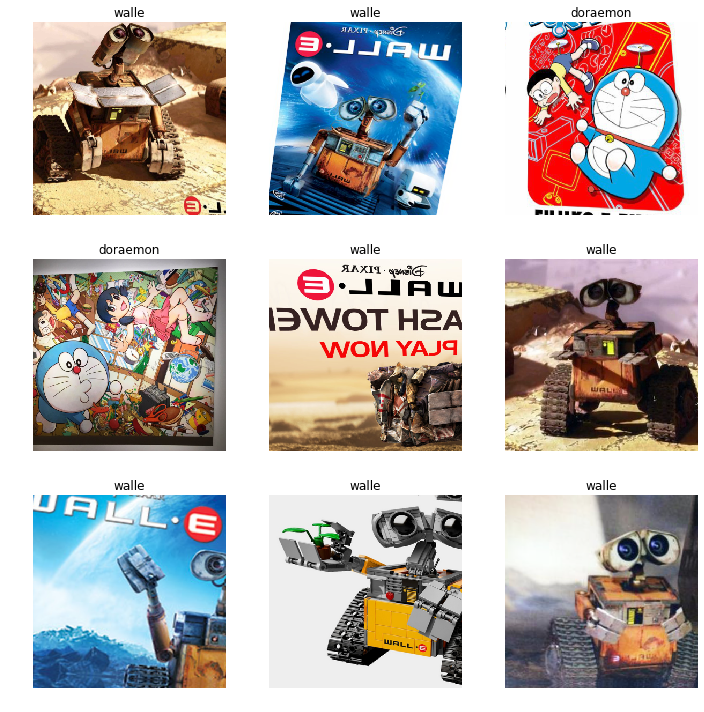

In [0]:
path = Path('/content/gdrive/My Drive/flt/sampl/')
data = ImageDataBunch.from_folder(path,test='test', ds_tfms=get_transforms(), size=360)
data.show_batch(rows=3, figsize=(10,10))

#Training

We need to tell the model three things: Data, Architecture and Loss Metrics. In the phase, we will tell all of them to the machine in a single line of code.

We asked the Convolutional Learner to receive the data we prepared, and the architecture will be a pre-trained model called resnet34, then to measure if it learned well, the metrics will the accuracy.

Simple and easy, right? Now we are all set, and we can ask the computer to learn.

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 97653735.73it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.701737,0.237124,0.939394,04:36
1,0.366446,0.023100,1.000000,04:33
2,0.239609,0.006242,1.000000,04:33
3,0.175268,0.004879,1.000000,04:32


In this line, we asked the learner to follow four cycle policy. If you want to understand the detail, you can refer to [this link](https://https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6).

Unbelievable fast, right? And how about the accuracy? Well, it’s 100% correct.

Let us see the result on validation set. We will grab the predictions and actual label on valid set, and ask the model to interpret the result to us

The interpreter then can tell us on which pictures it made more serious mistake

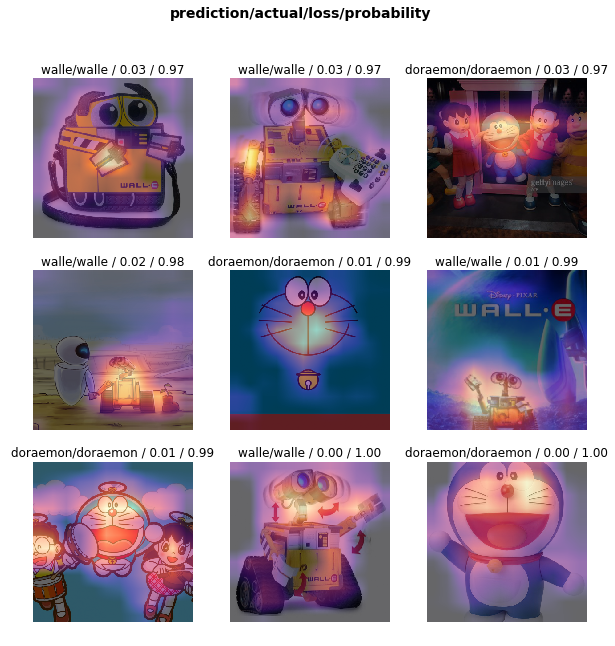

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(10,10))

As the accuracy on valid set is already 100%, you cannot see any wrong predictions. However, you can still see the different confidence levels.

And you can let the interpreter to plot the confusion matrix for us

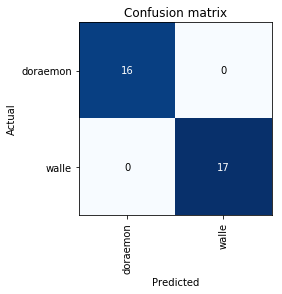

In [0]:
interp.plot_confusion_matrix()

#Evaluate

Is our model already perfect? Well, hard to say. We have already trained and validated it. Yet we need to let it see some totally unseen pictures, and examine the performance carefully.

In [0]:
preds, y, losses = learn.get_preds(DatasetType.Test, with_loss=True)
z = torch.argmax(preds, dim=1)

Get the predictions in csv file

In [0]:
v = []
j = []

for i in range(6):
  v.append(data.test_ds.items[i])
  j.append(z[i].cpu().numpy())

In [0]:
import pandas as pd
a = pd.DataFrame()
a['path'] = v
a['class'] = j
A = a['path'].astype(str).str.split("/", expand = True)
a['path'] = A.iloc[:,-1]

print(a.head())


               path class
0  doraemon.113.jpg     0
1     walle.137.jpg     1
2  doraemon.123.jpg     0
3  doraemon.137.jpg     0
4     walle.113.jpg     1


In [0]:
a.to_csv('vj_156.csv')

In [0]:
from google.colab import files
files.download('vj_156.csv')